In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use("bmh")

In [2]:
#  Best Track Data (HURDAT2)
# see https://www.nhc.noaa.gov/data/

url = 'https://www.nhc.noaa.gov/data/hurdat/hurdat2-1851-2022-050423.txt'


In [3]:
# Hack to load just the HEADER records first, one per storm
hurrdat = pd.read_csv(url, header=None, on_bad_lines='skip')

In [4]:
hurrdat.head()

,0,1,2,3
0,AL011851,UNNAMED,14,NaN
1,AL021851,UNNAMED,1,NaN
2,AL031851,UNNAMED,1,NaN
3,AL041851,UNNAMED,49,NaN
4,AL051851,UNNAMED,16,NaN


In [5]:
hurrdat['basin'] = hurrdat[0].str[0:2]

In [6]:
hurrdat['basin'].unique()

array(['AL'], dtype=object)

In [7]:
hurrdat.rename(columns={1: "name", 2: "entries"},  inplace=True)

In [8]:
hurrdat.name

0                   UNNAMED
1                   UNNAMED
2                   UNNAMED
3                   UNNAMED
4                   UNNAMED
               ...         
1947                  JULIA
1948                   KARL
1949                   LISA
1950                 MARTIN
1951                 NICOLE
Name: name, Length: 1952, dtype: object

In [9]:
hurrdat['num'] = hurrdat[0].str[2:4]

In [10]:
hurrdat['year'] = hurrdat[0].str[4:8]

In [11]:
yearly = hurrdat.groupby('year').count()

In [12]:
yearly

,0,name,entries,3,basin,num
year,,,,,,
1851,6,6,6,0,6,6
1852,5,5,5,0,5,5
1853,8,8,8,0,8,8
1854,5,5,5,0,5,5
1855,5,5,5,0,5,5
...,...,...,...,...,...,...
2018,16,16,16,0,16,16
2019,20,20,20,0,20,20
2020,31,31,31,0,31,31


In [13]:
from matplotlib.ticker import MultipleLocator

[Text(0, 0.5, 'Storms')]

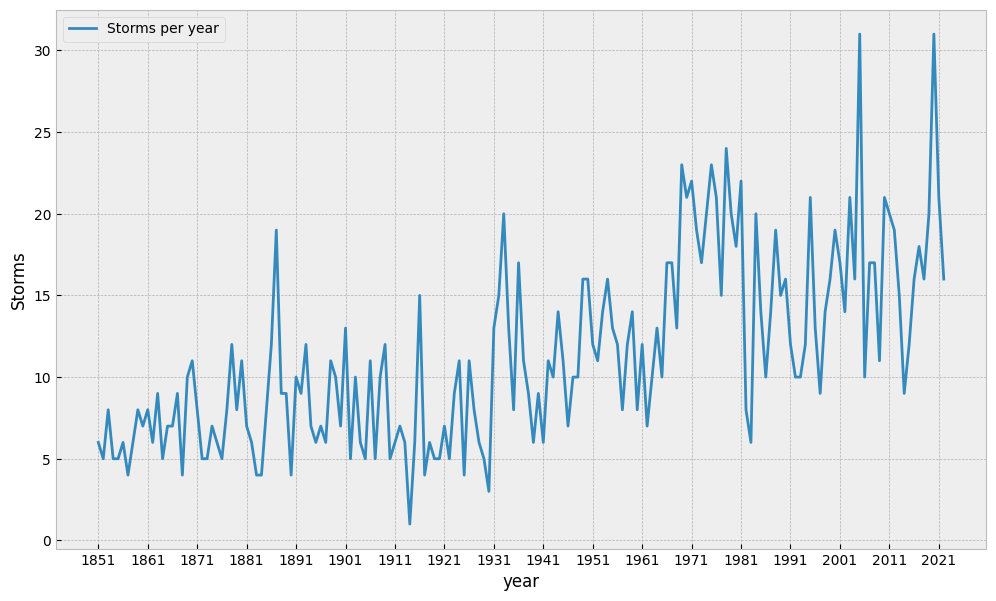

In [14]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.xaxis.set_major_locator(MultipleLocator(10))  # show every 10th year
ax = sns.lineplot( x = yearly.index , y = 'num' , data = yearly , ax = ax, label = 'Storms per year')
ax.set(ylabel='Storms')


In [77]:
recorded_entries = hurrdat.groupby(['year'])['entries','num'].mean()

<ipython-input-77-b53494b14c20>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  recorded_entries = hurrdat.groupby(['year'])['entries','num'].mean()
<ipython-input-77-b53494b14c20>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  recorded_entries = hurrdat.groupby(['year'])['entries','num'].mean()


In [78]:
recorded_entries

,entries
year,
1851,16.333333
1852,26.800000
1853,12.500000
1854,12.000000
1855,7.000000
...,...
2018,38.000000
2019,24.650000
2020,28.483871


[Text(0, 0.5, 'Entries')]

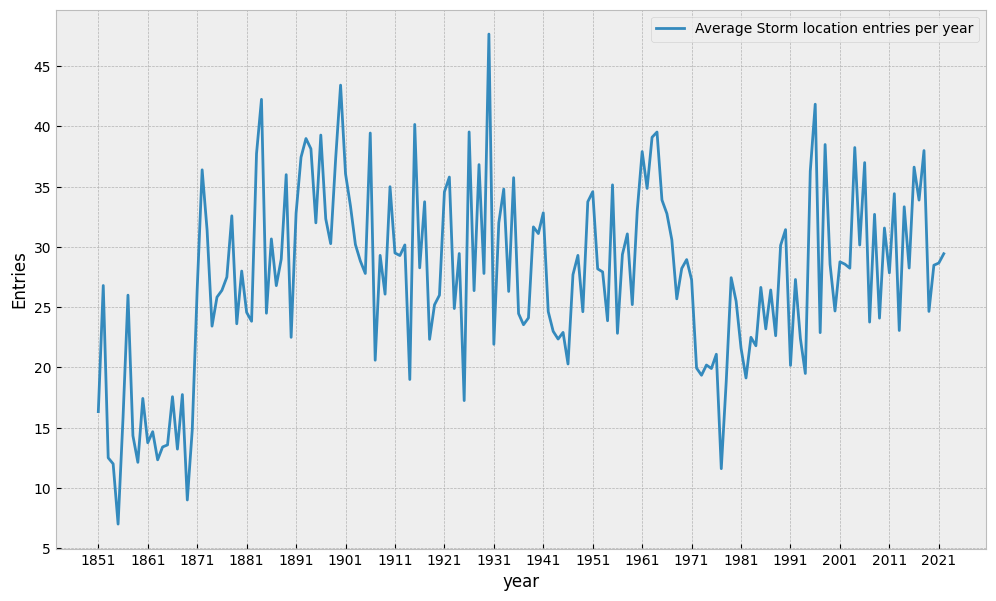

In [80]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.xaxis.set_major_locator(MultipleLocator(10))  # show every 10th year
ax = sns.lineplot( x = recorded_entries.index , y = 'entries' , data = recorded_entries , ax = ax, label = 'Average Storm location entries per year')
ax.set(ylabel='Entries')


In [81]:
# Load same csv, but skip a row to load individual storm measurements
entries = pd.read_csv(url, header=None, on_bad_lines='skip',skiprows=1)

In [53]:
column_names = [
    'day', 'utc', 'RecordIdentifier',
     'Status', 'Latitude', 'Longitude','MaxWind', 'Pressure',
    ' 34ktNE',' 34kSE',' 34ktSW',' 34ktNW',
    ' 50ktNE',' 50kSE',' 50ktSW',' 50ktNW',
    ' 64ktNE',' 64kSE',' 64ktSW',' 64ktNW',
    'WindRadius'
]
# 'ClosestApproach', 'Genesis', 'IntensityPeak', 'Landfall',
#    'MinCentralPressure', 'IntensityDetail', 'StatusChange', 'TrackDetail',
#    'MaxSustainedWindSpeed',

# Assign column names to the DataFrame
entries.columns = column_names


In [64]:
entries[-35:-25]

,day,utc,RecordIdentifier,Status,Latitude,Longitude,MaxWind,Pressure,34ktNE,34kSE,...,34ktNW,50ktNE,50kSE,50ktSW,50ktNW,64ktNE,64kSE,64ktSW,64ktNW,WindRadius
55892,20221103,0000,,HU,38.0N,46.4W,75.0,970.0,180.0,180.0,...,90.0,60.0,90.0,60.0,40.0,40.0,50.0,40.0,0.0,30.0
55893,20221103,0600,,HU,40.3N,43.6W,75.0,965.0,240.0,240.0,...,180.0,120.0,120.0,90.0,90.0,40.0,50.0,40.0,20.0,35.0
55894,20221103,1200,,EX,43.7N,38.8W,75.0,960.0,300.0,300.0,...,300.0,180.0,150.0,150.0,150.0,50.0,60.0,50.0,30.0,35.0
55895,20221103,1800,,EX,49.0N,35.3W,75.0,950.0,360.0,420.0,...,390.0,240.0,180.0,180.0,150.0,50.0,60.0,50.0,30.0,40.0
55896,20221104,0000,,EX,52.7N,38.0W,70.0,947.0,420.0,540.0,...,450.0,300.0,240.0,180.0,150.0,50.0,60.0,50.0,30.0,50.0
55897,20221104,0600,,EX,54.7N,37.7W,65.0,936.0,330.0,600.0,...,450.0,210.0,240.0,270.0,150.0,50.0,60.0,50.0,30.0,60.0
55898,20221104,1200,,EX,55.8N,37.2W,60.0,932.0,270.0,720.0,...,450.0,150.0,240.0,360.0,150.0,0.0,0.0,0.0,0.0,60.0
55899,20221104,1800,,EX,56.5N,36.5W,55.0,939.0,210.0,720.0,...,450.0,120.0,240.0,300.0,150.0,0.0,0.0,0.0,0.0,60.0
55900,AL172022,NICOLE,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55901,20221106,1200,,LO,20.6N,66.8W,30.0,1005.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0


In [65]:
entries = entries[entries['Status'].notna()]

In [66]:
entries['day']= pd.to_datetime(entries['day'])

In [70]:
yearly_wind = entries.groupby(entries.day.dt.year).max('MaxWind')

In [71]:
yearly_wind

,MaxWind,Pressure,34ktNE,34kSE,34ktSW,34ktNW,50ktNE,50kSE,50ktSW,50ktNW,64ktNE,64kSE,64ktSW,64ktNW,WindRadius
day,,,,,,,,,,,,,,,
1851,100.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1852,100.0,961.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1853,130.0,924.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1854,110.0,950.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1855,110.0,997.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,140.0,1021.0,780.0,600.0,660.0,570.0,160.0,270.0,330.0,270.0,70.0,180.0,180.0,180.0,-999.0
2019,160.0,1016.0,470.0,400.0,470.0,500.0,200.0,250.0,300.0,390.0,100.0,130.0,130.0,110.0,-999.0
2020,135.0,1018.0,470.0,390.0,360.0,300.0,240.0,180.0,180.0,210.0,90.0,90.0,90.0,110.0,-999.0


[Text(0, 0.5, 'Max Wind (Knots)')]

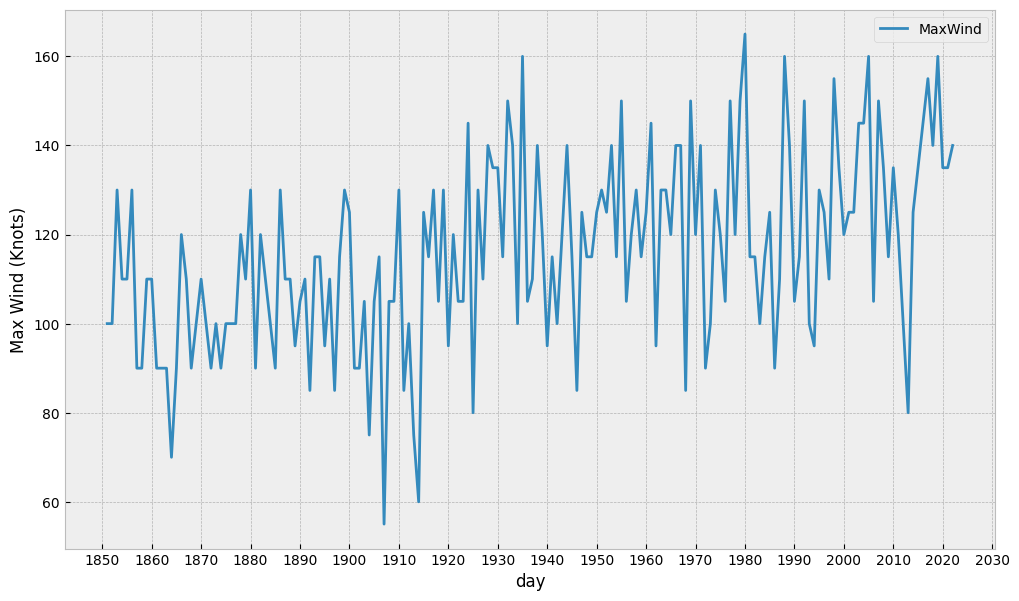

In [72]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.xaxis.set_major_locator(MultipleLocator(10))  # show every 10th year
ax = sns.lineplot( x = yearly_wind.index , y = 'MaxWind' , data = yearly_wind , ax = ax, label = 'MaxWind')
ax.set(ylabel='Max Wind (Knots)')


In [73]:
yearly_pressure = entries.groupby(entries.day.dt.year).min('Pressure')

[Text(0, 0.5, 'Min Pressure (millibars)')]

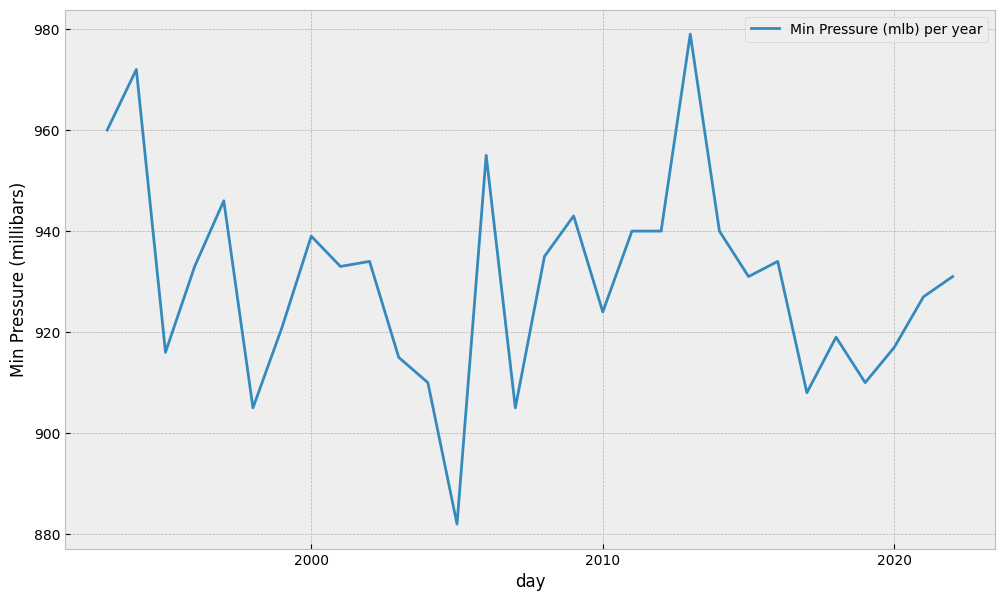

In [74]:
# Going back only 30 years here, as millibars not recorded before then.

fig, ax = plt.subplots(figsize=(12, 7))
ax.xaxis.set_major_locator(MultipleLocator(10))  # show every 10th year
ax = sns.lineplot( x = yearly_pressure[-30:].index , y = 'Pressure' , data = yearly_pressure[-30:] , ax = ax, label = 'Min Pressure (mlb) per year')
ax.set(ylabel='Min Pressure (millibars)')


In [75]:
yearly_radius  = entries.groupby(entries.day.dt.year).max('WindRadius')

[Text(0, 0.5, 'Max Radius (nautical miles)')]

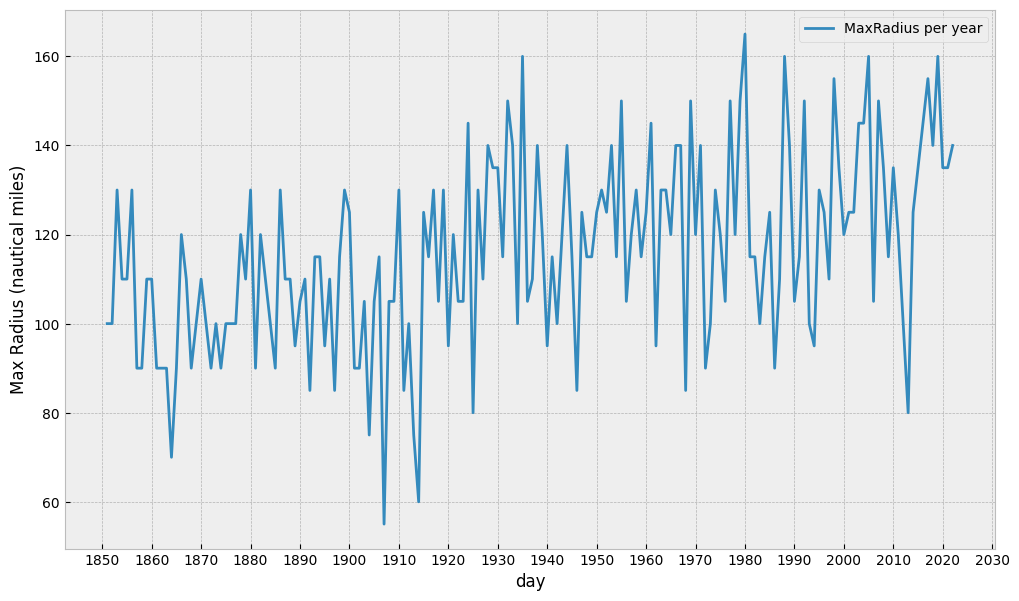

In [76]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.xaxis.set_major_locator(MultipleLocator(10))  # show every 10th year
ax = sns.lineplot( x = yearly_radius.index , y = 'MaxWind' , data = yearly_radius , ax = ax, label = 'MaxRadius per year')
ax.set(ylabel='Max Radius (nautical miles)')
